In [72]:
# Some comments here
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from scipy.io import readsav



Filename: ../input/ImageSpectralScan/s000.ImagingSpectralScan_8542.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   ()      
  1                1 ImageHDU        56   (1000, 1000)   int16   
  2                1 ImageHDU        56   (1000, 1000)   int16   
  3                1 ImageHDU        56   (1000, 1000)   int16   
  4                1 ImageHDU        56   (1000, 1000)   int16   
  5                1 ImageHDU        56   (1000, 1000)   int16   
  6                1 ImageHDU        56   (1000, 1000)   int16   
  7                1 ImageHDU        56   (1000, 1000)   int16   
  8                1 ImageHDU        56   (1000, 1000)   int16   
  9                1 ImageHDU        56   (1000, 1000)   int16   
 10                1 ImageHDU        56   (1000, 1000)   int16   
 11                1 ImageHDU        56   (1000, 1000)   int16   
 12                1 ImageHDU        56   (1000, 1000)   int16   
 13                1 Im

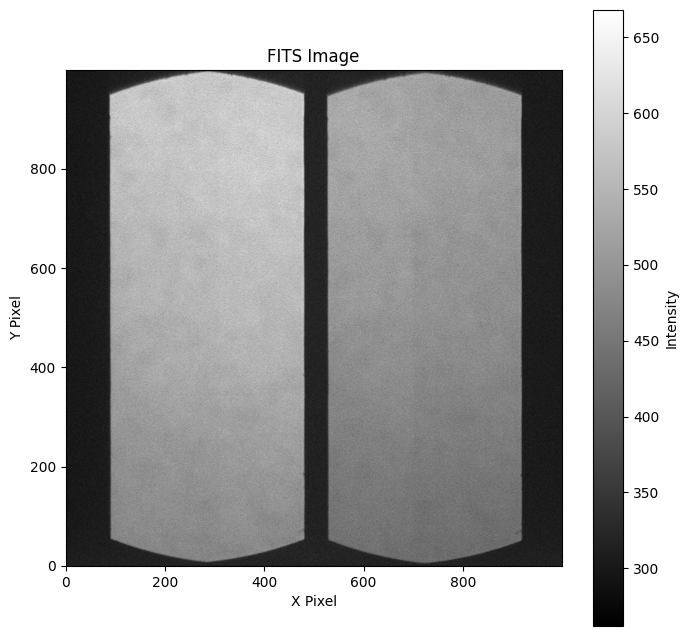

In [73]:


fits_files = glob.glob("../input/ImageSpectralScan/*8542.fits")
# Check if FITS files exist
if fits_files:
    # Open the first FITS file
    with fits.open(fits_files[0]) as hdul:
        hdul.info()  # Print summary of HDU list

        # Access primary data 
        image_data = hdul[1].data
        header = hdul[1].header          #should we do that for all the hdul?

        # Print header and data shape
        # print(header)
        if image_data is not None:
            # print(f"Data shape: {image_data.shape}")

            # Plot the image data
            plt.figure(figsize=(8, 8))
            plt.imshow(image_data, cmap='gray', origin='lower')
            plt.colorbar(label='Intensity')
            plt.title('FITS Image')
            plt.xlabel('X Pixel')
            plt.ylabel('Y Pixel')
            plt.show()
        else:
            print("No data found in the primary HDU.")
else:
    print("No FITS files found in the directory.")

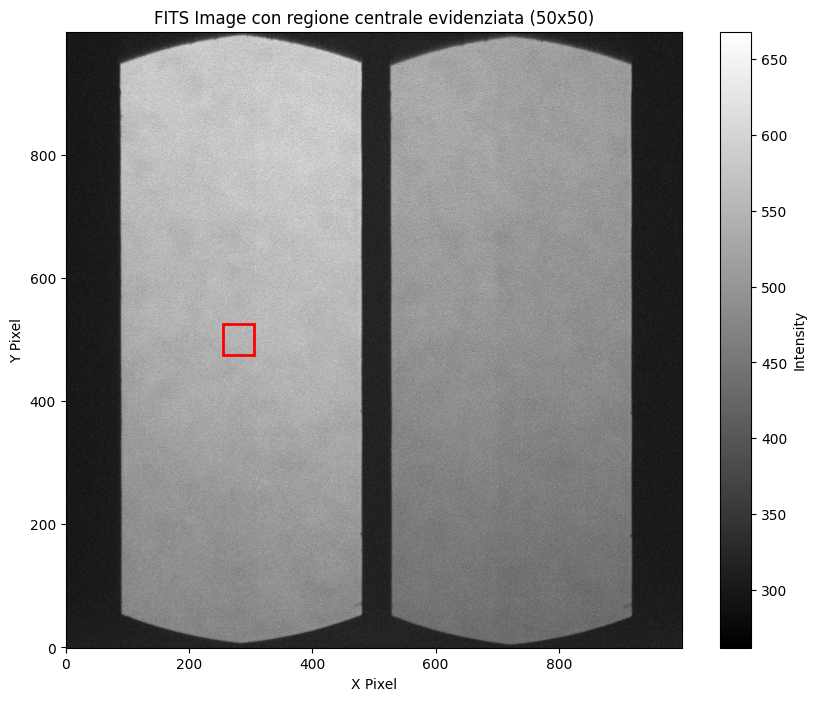

In [74]:

# Parametri per la regione centrale
half_size = 25  # Metà della dimensione della regione centrale (100x100)
y_center, x_center = 500, 280  # Centro dell'immagine 1000x1000
y_start, y_end = y_center - half_size, y_center + half_size
x_start, x_end = x_center - half_size, x_center + half_size

# Plot con rettangolo evidenziato
plt.figure(figsize=(10, 8))
plt.imshow(image_data, cmap='gray', origin='lower')

# Aggiungi rettangolo rosso per evidenziare la regione
rect = Rectangle((x_start, y_start), 
                    width=2*half_size, 
                    height=2*half_size,
                    linewidth=2, 
                    edgecolor='r', 
                    facecolor='none')
plt.gca().add_patch(rect)

plt.colorbar(label='Intensity')
plt.title('FITS Image con regione centrale evidenziata (50x50)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

In [75]:
if fits_files:
    with fits.open(fits_files[0]) as hdul:
        # Lista per salvare le regioni centrali di tutte le HDUs
        central_regions = []
        
        # Iteriamo su tutte le HDUs (escludendo la PRIMARY HDU)
        for hdu in hdul[1:]:
            data = hdu.data
            if data is not None:
                # Estraiamo la regione centrale
                central_region = np.mean(data[y_start:y_end, x_start:x_end])
                central_regions.append(central_region)
        
central_regions = central_regions / np.max(central_regions)
     

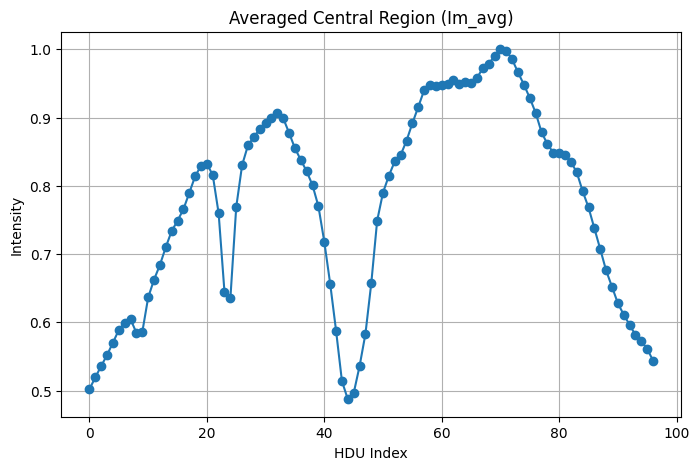

In [76]:

plt.figure(figsize=(8, 5))
plt.plot(central_regions, marker='o', linestyle='-')
plt.title('Averaged Central Region (Im_avg)')
plt.xlabel('HDU Index')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


In [77]:



file_pattern = "../input/prefilter/*8542*.sav"
file_list = glob.glob(file_pattern)

if not file_list:
    print("No files found matching the pattern.")
else:
    for file_path in file_list:
        try:
            prefilter = readsav(file_path)
            print(f"Successfully read: {file_path}")
            # `data` is a dictionary-like object containing variables
        except Exception as e:
            print(f"Error reading {file_path}: {e}")


            

Successfully read: ../input/prefilter/prefilter.8542.reference.profile.Apr2015.sav


In [78]:
prefilter.keys()

dict_keys(['prefilt8542_ref_wvscl', 'prefilt8542_ref_main', 'prefilt8542_fringe', 'prefilt8542_ref_interval', 'prefilt8542_ref_source'])

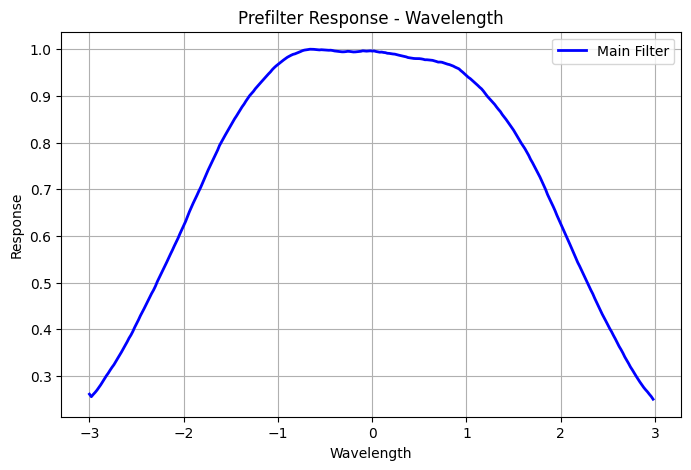

In [79]:

# Extract data
wavelengths = prefilter['prefilt8542_ref_wvscl']  # X-axis (wavelength scale)
main_filter = prefilter['prefilt8542_ref_main']   # Y-axis (main filter response)
fringe_filter = prefilter['prefilt8542_fringe']  # Y-axis (fringe response)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(wavelengths, main_filter*fringe_filter, label="Main Filter", color='b', linewidth=2)


# Labels and title
plt.xlabel("Wavelength")
plt.ylabel("Response")
plt.title("Prefilter Response - Wavelength")
plt.legend()
plt.grid()

# Show plot
plt.show()
